# LOADING HOTELS NAME AND CITY INFORMATION 

In [51]:
import pandas as pd

# Load the data
hotels_data_path = 'dim_hotels.csv'
hotels_df = pd.read_csv(hotels_data_path)

hotels_df.head()


,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


# HOTELS DISTRIBUTION 

In [52]:
#CATEGORY WISE
category_distribution = hotels_df['category'].value_counts()
category_distribution

category
Luxury      16
Business     9
Name: count, dtype: int64

In [53]:
# CITY WISE
city_distribution = hotels_df['city'].value_counts()
city_distribution

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [54]:
# PROPERTY NAME WISE
category_by_property_name = hotels_df[['property_name', 'category']].sort_values(by='category')

category_by_property_name


,property_name,category
24,Atliq Seasons,Business
2,Atliq City,Business
20,Atliq City,Business
5,Atliq Palace,Business
8,Atliq City,Business
17,Atliq Palace,Business
11,Atliq Palace,Business
23,Atliq Palace,Business
14,Atliq City,Business
22,Atliq Bay,Luxury


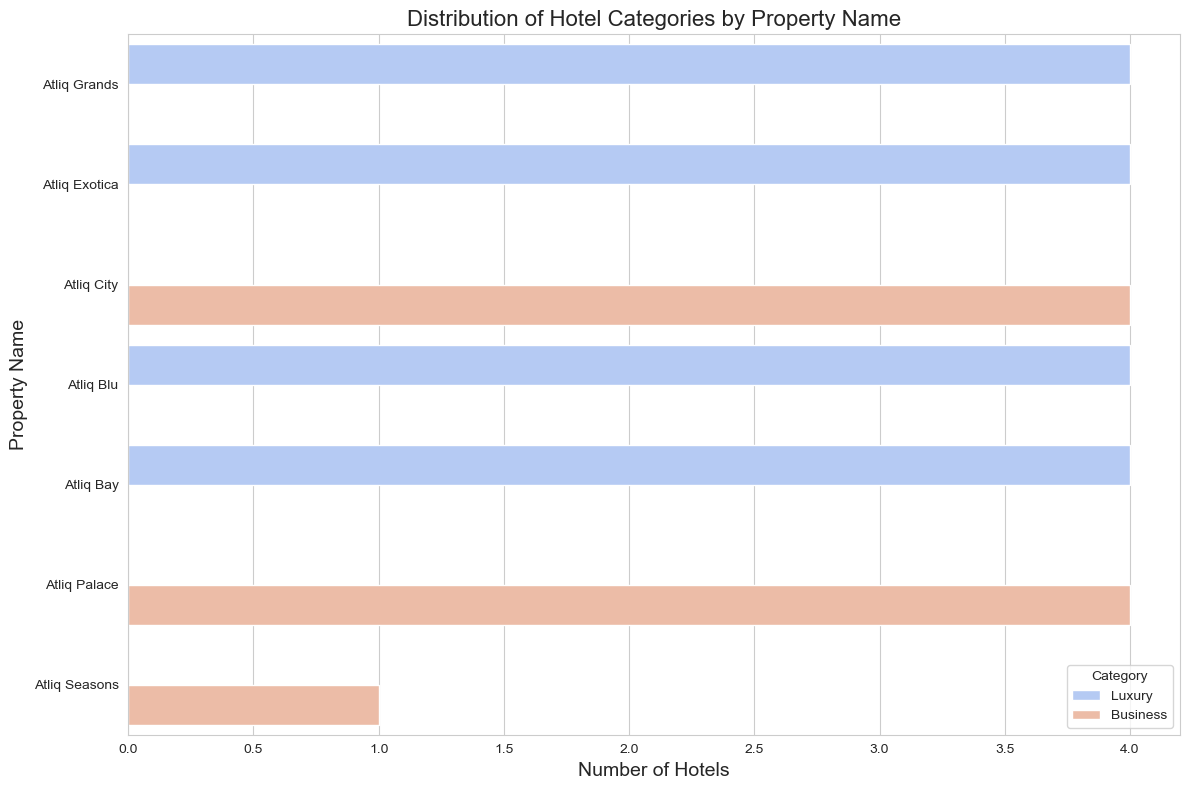

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.countplot(y='property_name', hue='category', data=hotels_df, palette='coolwarm', order=hotels_df['property_name'].value_counts().index)

plt.title('Distribution of Hotel Categories by Property Name', fontsize=16)
plt.xlabel('Number of Hotels', fontsize=14)
plt.ylabel('Property Name', fontsize=14)
plt.legend(title='Category')

plt.tight_layout()
plt.show()


# LOADING ROOM CLASSES

In [56]:
rooms_data_path = 'dim_rooms.csv'
rooms_df = pd.read_csv(rooms_data_path)

rooms_df.head()


,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


# LOADING ROOM BOOKING DATA

In [57]:
bookings_data_path = 'fact_aggregated_bookings.csv'
bookings_df = pd.read_csv(bookings_data_path)

bookings_df

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


# MERGING ROOM CLASS WITH BOOKINGS

In [58]:
# Merge bookings data with room data
bookings_with_rooms_df = pd.merge(bookings_df, rooms_df, left_on='room_category', right_on='room_id', how='left')
bookings_with_rooms_df.drop('room_id', axis=1, inplace=True)

bookings_with_rooms_df.head()


,property_id,check_in_date,room_category,successful_bookings,capacity,room_class
0,16559,01-May-22,RT1,25,30,Standard
1,19562,01-May-22,RT1,28,30,Standard
2,19563,01-May-22,RT1,23,30,Standard
3,17558,01-May-22,RT1,13,19,Standard
4,16558,01-May-22,RT1,18,19,Standard


# ANALYZING SUCCESSFUL BOOKINGS

In [59]:
successful_bookings_by_room_class = bookings_with_rooms_df.groupby('room_class')['successful_bookings'].sum().reset_index()
successful_bookings_by_room_class = successful_bookings_by_room_class.sort_values(by='successful_bookings', ascending=False)

successful_bookings_by_room_class

,room_class,successful_bookings
0,Elite,49505
3,Standard,38446
1,Premium,30566
2,Presidential,16073


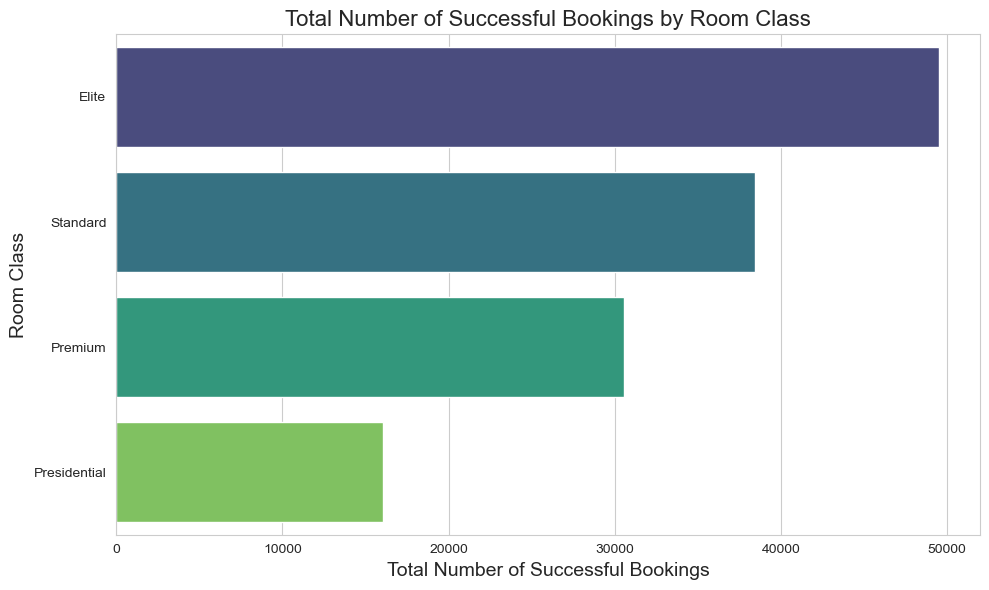

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='successful_bookings', y='room_class', data=successful_bookings_by_room_class, palette='viridis')

plt.title('Total Number of Successful Bookings by Room Class', fontsize=16)
plt.xlabel('Total Number of Successful Bookings', fontsize=14)
plt.ylabel('Room Class', fontsize=14)

plt.tight_layout()
plt.show()

# ANALYZING CAPACITY CONSUMPTION

In [61]:
# total capacity and successful bookings 
capacity_and_bookings = bookings_with_rooms_df.groupby('room_class').agg({
    'successful_bookings': 'sum',
    'capacity': 'sum'
}).reset_index()

# average capacity consumption 
capacity_and_bookings['average_capacity_consumption'] = capacity_and_bookings['successful_bookings'] / capacity_and_bookings['capacity']

capacity_and_bookings_sorted = capacity_and_bookings.sort_values(by='average_capacity_consumption', ascending=False)
capacity_and_bookings_sorted


,room_class,successful_bookings,capacity,average_capacity_consumption
2,Presidential,16073,27140,0.592225
3,Standard,38446,66424,0.578797
0,Elite,49505,85928,0.576122
1,Premium,30566,53084,0.575804


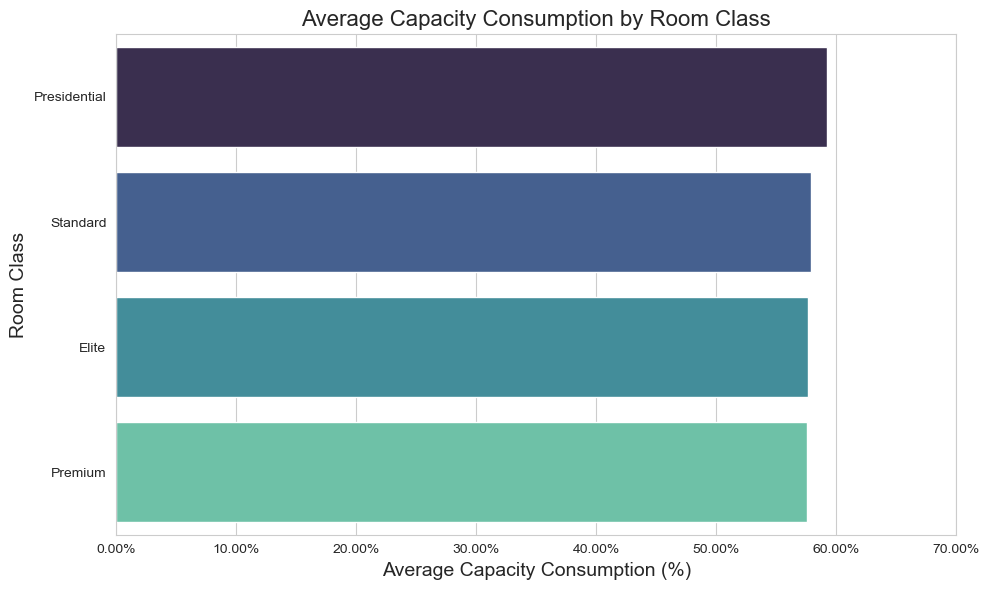

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='average_capacity_consumption', y='room_class', data=capacity_and_bookings_sorted, palette='mako')

plt.xlabel('Average Capacity Consumption (%)', fontsize=14)
plt.ylabel('Room Class', fontsize=14)
plt.title('Average Capacity Consumption by Room Class', fontsize=16)

plt.xticks(ticks=plt.xticks()[0], labels=[f"{x*100:.2f}%" for x in plt.xticks()[0]])

plt.tight_layout()
plt.show()


In [63]:
# Merge the bookings with rooms data with the hotel data to include the city information
bookings_rooms_hotels_df = pd.merge(bookings_with_rooms_df, hotels_df[['property_id', 'city']], on='property_id', how='left')

# total successful bookings and capacity for each city
city_capacity_and_bookings = bookings_rooms_hotels_df.groupby('city').agg({
    'successful_bookings': 'sum',
    'capacity': 'sum'
}).reset_index()

# average capacity consumption for each city
city_capacity_and_bookings['average_capacity_consumption'] = city_capacity_and_bookings['successful_bookings'] / city_capacity_and_bookings['capacity']

city_capacity_and_bookings_sorted = city_capacity_and_bookings.sort_values(by='average_capacity_consumption', ascending=False)
city_capacity_and_bookings_sorted


,city,successful_bookings,capacity,average_capacity_consumption
1,Delhi,24231,40020,0.605472
2,Hyderabad,34888,60076,0.580731
3,Mumbai,43455,75072,0.578844
0,Bangalore,32016,57408,0.557692


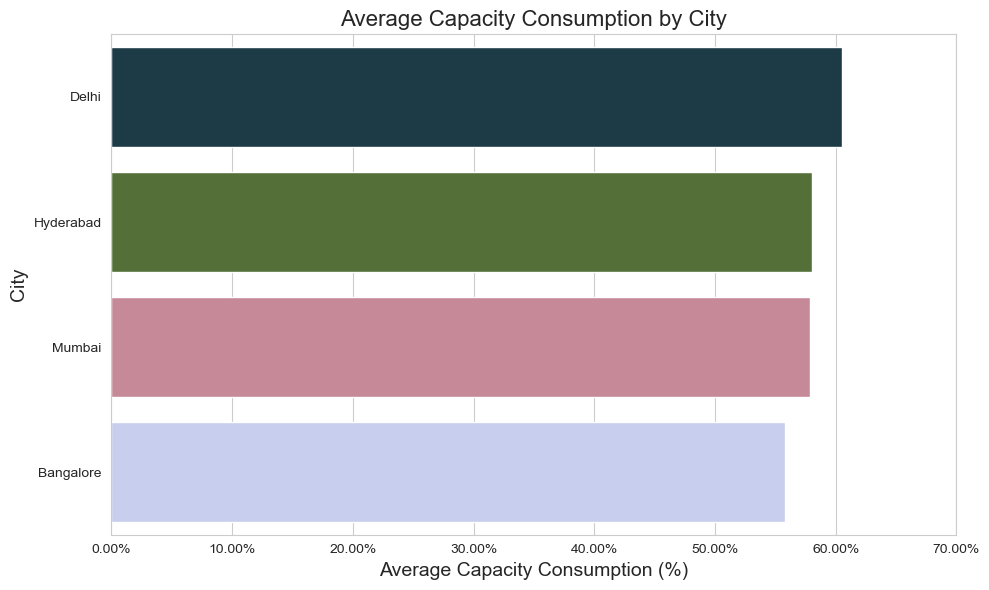

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='average_capacity_consumption', y='city', data=city_capacity_and_bookings_sorted, palette='cubehelix')

plt.xlabel('Average Capacity Consumption (%)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.title('Average Capacity Consumption by City', fontsize=16)

plt.xticks(ticks=plt.xticks()[0], labels=[f"{x*100:.2f}%" for x in plt.xticks()[0]])

plt.tight_layout()
plt.show()


# REVENUE ANALYSIS

In [65]:
bookings_revenue_data_path = 'fact_bookings.csv'
bookings_revenue_df = pd.read_csv(bookings_revenue_data_path)

bookings_revenue_df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [66]:
# Merge bookings revenue data with room data 
bookings_revenue_with_rooms_df = pd.merge(bookings_revenue_df, rooms_df, left_on='room_category', right_on='room_id', how='left')

# total revenue realized for each room class
total_revenue_by_room_class = bookings_revenue_with_rooms_df.groupby('room_class')['revenue_realized'].sum().reset_index()

total_revenue_by_room_class_sorted = total_revenue_by_room_class.sort_values(by='revenue_realized', ascending=False)
total_revenue_by_room_class_sorted

,room_class,revenue_realized
0,Elite,560271204
1,Premium,462166344
2,Presidential,376752786
3,Standard,309580895


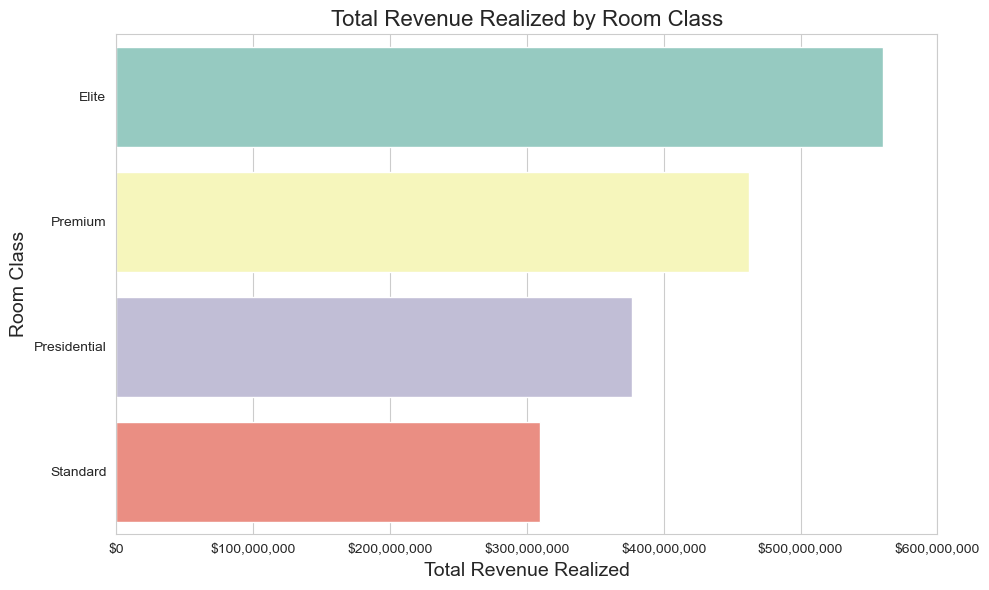

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue_realized', y='room_class', data=total_revenue_by_room_class_sorted, palette='Set3')

plt.title('Total Revenue Realized by Room Class', fontsize=16)
plt.xlabel('Total Revenue Realized', fontsize=14)
plt.ylabel('Room Class', fontsize=14)

plt.xticks(ticks=plt.xticks()[0], labels=['${:,.0f}'.format(x) for x in plt.xticks()[0]])

plt.tight_layout()
plt.show()

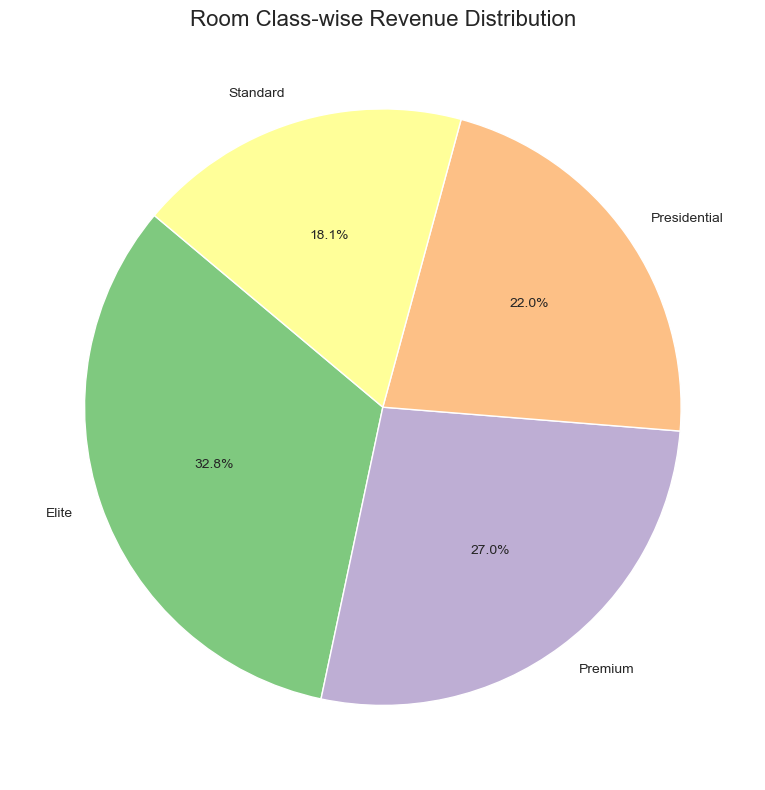

In [68]:
plt.figure(figsize=(10, 8))
plt.pie(total_revenue_by_room_class_sorted['revenue_realized'], labels=total_revenue_by_room_class_sorted['room_class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Accent'))

plt.title('Room Class-wise Revenue Distribution', fontsize=16)

plt.tight_layout()
plt.show()

In [69]:
# Merge the bookings revenue data with the hotel data 
bookings_revenue_with_city_df = pd.merge(bookings_revenue_with_rooms_df, hotels_df[['property_id', 'city']], on='property_id', how='left')

# total revenue realized for each city
total_revenue_by_city = bookings_revenue_with_city_df.groupby('city')['revenue_realized'].sum().reset_index()

total_revenue_by_city_sorted = total_revenue_by_city.sort_values(by='revenue_realized', ascending=False)
total_revenue_by_city_sorted


,city,revenue_realized
3,Mumbai,668640991
0,Bangalore,420397050
2,Hyderabad,325232870
1,Delhi,294500318


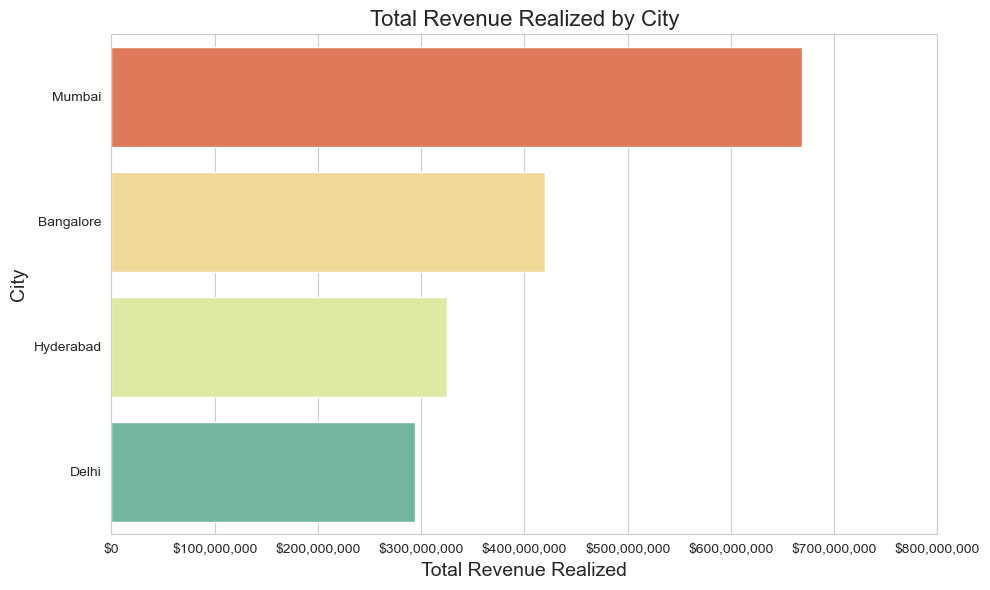

In [22]:
# Setting up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue_realized', y='city', data=total_revenue_by_city_sorted, palette='Spectral')

# Adding titles and labels
plt.title('Total Revenue Realized by City', fontsize=16)
plt.xlabel('Total Revenue Realized', fontsize=14)
plt.ylabel('City', fontsize=14)

# Format the x-axis labels to show currency
plt.xticks(ticks=plt.xticks()[0], labels=['${:,.0f}'.format(x) for x in plt.xticks()[0]])

plt.tight_layout()
plt.show()


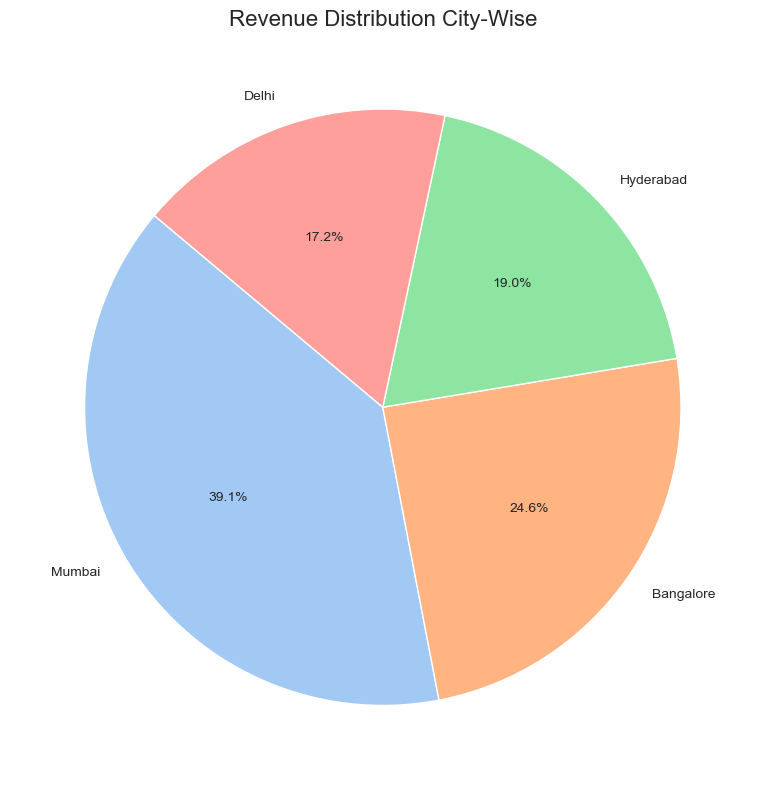

In [70]:
plt.figure(figsize=(10, 8))
plt.pie(total_revenue_by_city_sorted['revenue_realized'], labels=total_revenue_by_city_sorted['city'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Distribution City-Wise', fontsize=16)

plt.tight_layout()
plt.show()

# AVERAGE ROOM PRICE ANALYSIS FOR EACH CITY AND ROOM CLASS

In [71]:
category_city_revenue_corrected = bookings_full_data_df.groupby(['city', 'room_class_x']).agg({
    'revenue_realized': 'sum',
    'booking_id': 'count'
}).reset_index()

#  average price per room for each category in each city 
category_city_revenue_corrected['average_price_per_room'] = category_city_revenue_corrected['revenue_realized'] / category_city_revenue_corrected['booking_id']

category_city_revenue_sorted_corrected = category_city_revenue_corrected.sort_values(by=['city', 'room_class_x'])
category_city_revenue_sorted_corrected


,city,room_class_x,revenue_realized,booking_id,average_price_per_room
0,Bangalore,Elite,138172770,11718,11791.497696
1,Bangalore,Premium,126931320,7914,16038.832449
2,Bangalore,Presidential,74210010,2940,25241.500000
3,Bangalore,Standard,81082950,9444,8585.657560
4,Delhi,Elite,97874280,8858,11049.252653
5,Delhi,Premium,72776256,4869,14946.858903
6,Delhi,Presidential,60554368,2560,23654.050000
7,Delhi,Standard,63295414,7944,7967.700655
8,Hyderabad,Elite,92019420,11644,7902.732738
9,Hyderabad,Premium,86751120,8077,10740.512567


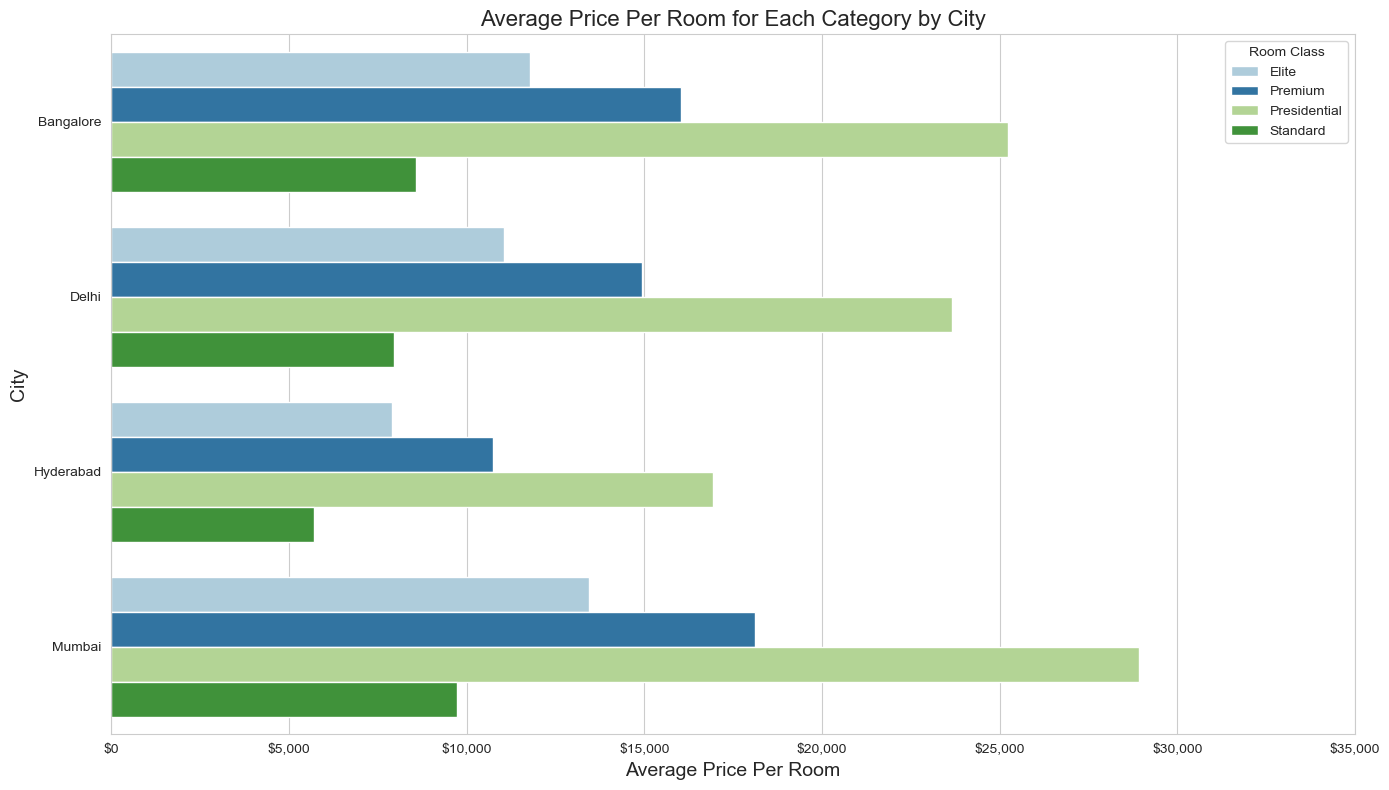

In [72]:
plt.figure(figsize=(14, 8))
sns.barplot(x='average_price_per_room', y='city', hue='room_class_x', data=category_city_revenue_sorted_corrected, palette='Paired')

plt.title('Average Price Per Room for Each Category by City', fontsize=16)
plt.xlabel('Average Price Per Room', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.legend(title='Room Class')

plt.xticks(ticks=plt.xticks()[0], labels=['${:,.0f}'.format(x) for x in plt.xticks()[0]])

plt.tight_layout()
plt.show()

# CANCELLATION RATES ANALYSIS

In [73]:
bookings_status_summary = bookings_full_data_df.groupby(['city', 'room_class_x', 'booking_status']).size().unstack(fill_value=0).reset_index()

#  total bookings for each room class in each city
bookings_status_summary['Total Bookings'] = bookings_status_summary['Cancelled'] + bookings_status_summary['Checked Out']

# cancellation rate for each room class in each city
bookings_status_summary['Cancellation Rate'] = (bookings_status_summary['Cancelled'] / bookings_status_summary['Total Bookings']) * 100

cancellation_rate_summary = bookings_status_summary[['city', 'room_class_x', 'Total Bookings', 'Cancelled', 'Cancellation Rate']]
cancellation_rate_summary


booking_status,city,room_class_x,Total Bookings,Cancelled,Cancellation Rate
0,Bangalore,Elite,11110,2986,26.876688
1,Bangalore,Premium,7547,1960,25.970584
2,Bangalore,Presidential,2790,747,26.774194
3,Bangalore,Standard,8940,2309,25.827740
4,Delhi,Elite,8429,2208,26.195278
5,Delhi,Premium,4625,1219,26.356757
6,Delhi,Presidential,2432,640,26.315789
7,Delhi,Standard,7561,2005,26.517656
8,Hyderabad,Elite,11032,2888,26.178390
9,Hyderabad,Premium,7661,1965,25.649393


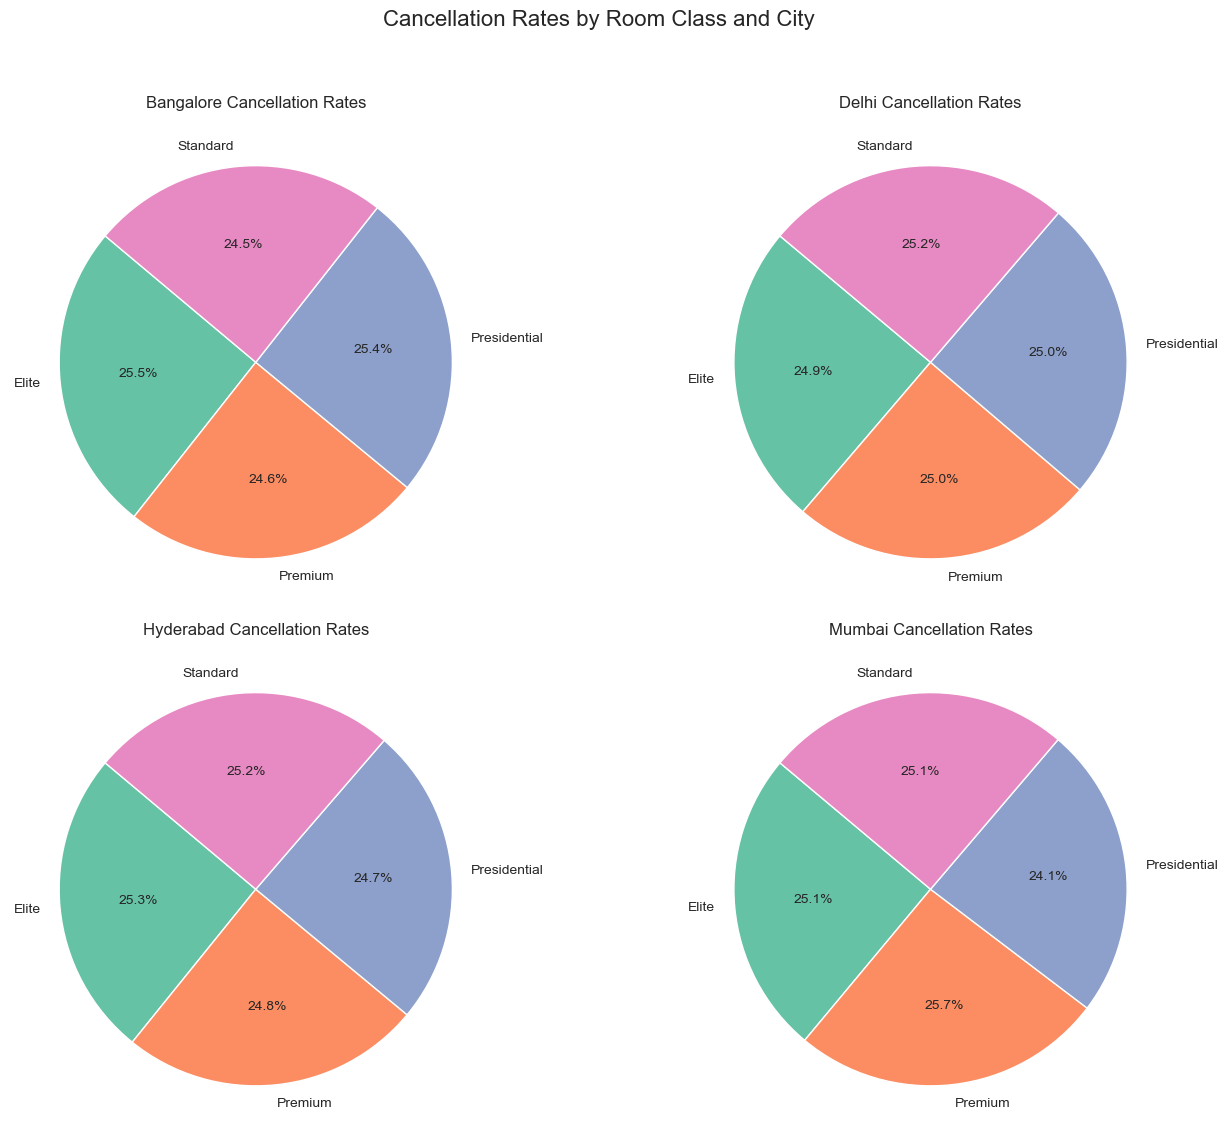

In [74]:
cities = cancellation_rate_summary['city'].unique()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()  

for i, city in enumerate(cities):
    city_data = cancellation_rate_summary[cancellation_rate_summary['city'] == city]
    
    labels = city_data['room_class_x']
    sizes = city_data['Cancellation Rate']
    
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', n_colors=len(labels)))
    axes[i].set_title(f'{city} Cancellation Rates')

plt.suptitle('Cancellation Rates by Room Class and City', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


# MONTHLY REVENUE ANALYSIS 

In [75]:
# Convert 'check_in_date' to datetime format to extract month and year
bookings_revenue_df['check_in_date'] = pd.to_datetime(bookings_revenue_df['check_in_date'])
bookings_revenue_df['YearMonth'] = bookings_revenue_df['check_in_date'].dt.to_period('M')

# revenue by year and month
monthly_revenue = bookings_revenue_df.groupby('YearMonth')['revenue_realized'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].astype(str)
monthly_revenue


,YearMonth,revenue_realized
0,2022-05,581930666
1,2022-06,553932355
2,2022-07,572908208


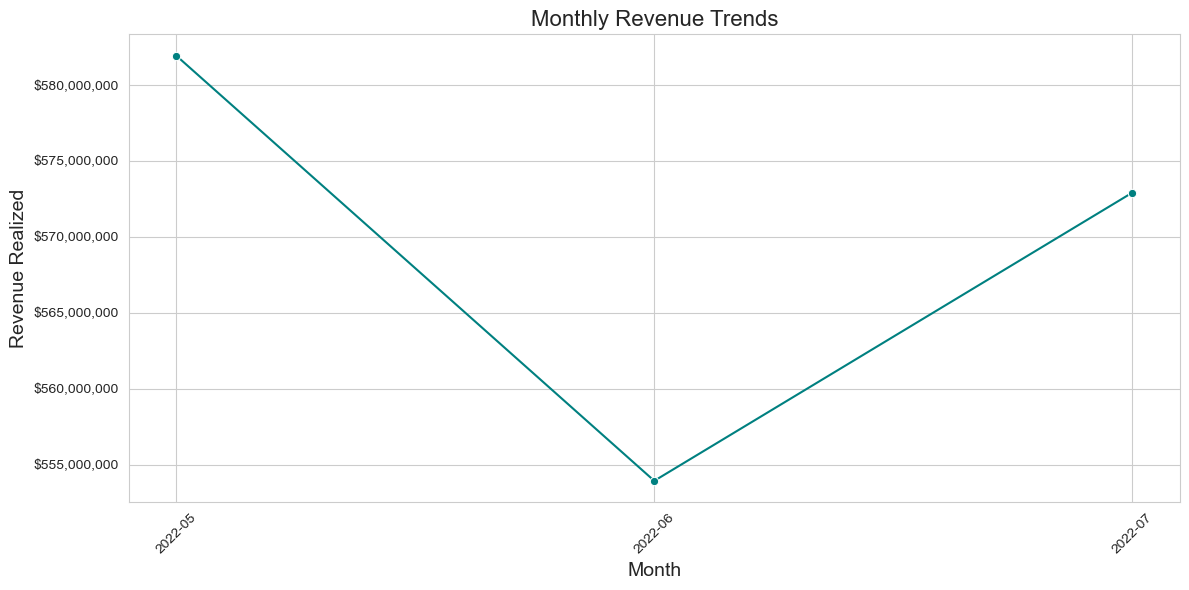

In [76]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='revenue_realized', data=monthly_revenue, marker='o', linestyle='-', color='teal')

plt.title('Monthly Revenue Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue Realized', fontsize=14)
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.grid(True)
plt.tight_layout()
plt.show()

# DAILY REVENUE ANALYSIS

In [77]:
# revenue by check-in date for daily trends
daily_revenue = bookings_revenue_df.groupby(bookings_revenue_df['check_in_date'].dt.date)['revenue_realized'].sum().reset_index()
daily_revenue['check_in_date'] = pd.to_datetime(daily_revenue['check_in_date'])
daily_revenue

,check_in_date,revenue_realized
0,2022-05-01,25357111
1,2022-05-02,17408806
2,2022-05-03,17534188
3,2022-05-04,17332054
4,2022-05-05,17901036
...,...,...
87,2022-07-27,14438063
88,2022-07-28,14679184
89,2022-07-29,14904772
90,2022-07-30,20981473


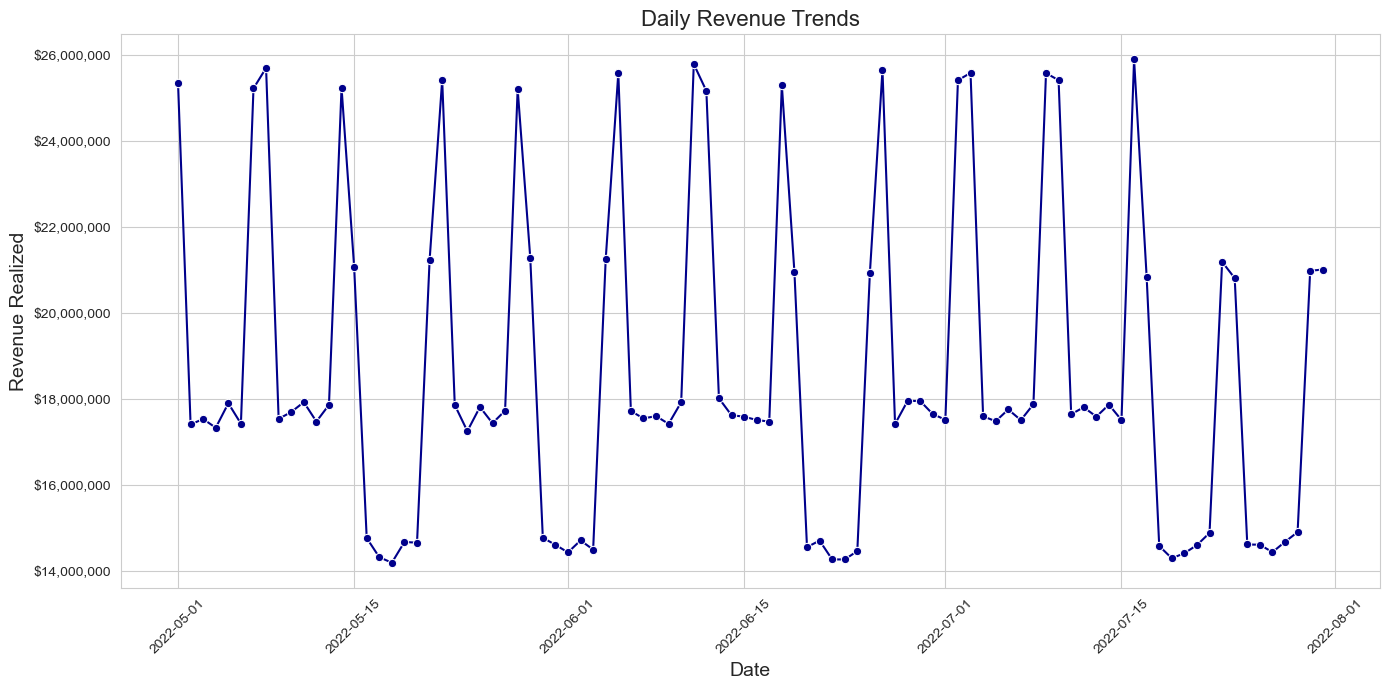

In [78]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='check_in_date', y='revenue_realized', data=daily_revenue, marker='o', linestyle='-', color='darkblue')

plt.title('Daily Revenue Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue Realized', fontsize=14)
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.grid(True)
plt.tight_layout()
plt.show()

# CUSTOMER RATING ANALYSIS

In [79]:
ratings_distribution = bookings_revenue_df['ratings_given'].dropna().describe()
ratings_distribution

count    56683.000000
mean         3.619004
std          1.235009
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: ratings_given, dtype: float64

In [80]:
# Merge bookings data with room and hotel data 
bookings_ratings_df = pd.merge(bookings_revenue_df, rooms_df, left_on='room_category', right_on='room_id', how='left')
bookings_ratings_df = pd.merge(bookings_ratings_df, hotels_df[['property_id', 'city']], on='property_id', how='left')

# average ratings by room class
average_ratings_by_room_class = bookings_ratings_df.groupby('room_class')['ratings_given'].mean().reset_index()

# average ratings by city
average_ratings_by_city = bookings_ratings_df.groupby('city')['ratings_given'].mean().reset_index()
average_ratings_by_room_class, average_ratings_by_city

(     room_class  ratings_given
 0         Elite       3.602902
 1       Premium       3.592317
 2  Presidential       3.686919
 3      Standard       3.631829,
         city  ratings_given
 0  Bangalore       3.407681
 1      Delhi       3.779015
 2  Hyderabad       3.661132
 3     Mumbai       3.650455)

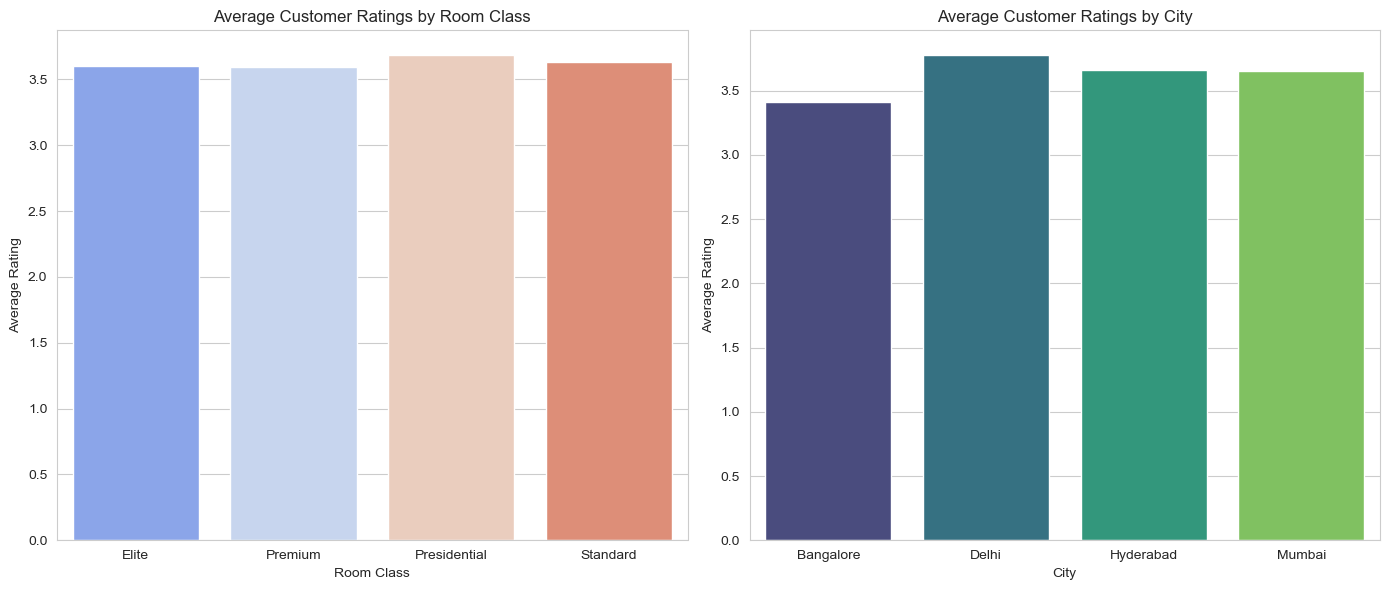

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Average Ratings by Room Class
sns.barplot(x='room_class', y='ratings_given', data=average_ratings_by_room_class, ax=ax[0], palette='coolwarm')
ax[0].set_title('Average Customer Ratings by Room Class')
ax[0].set_xlabel('Room Class')
ax[0].set_ylabel('Average Rating')

# Average Ratings by City
sns.barplot(x='city', y='ratings_given', data=average_ratings_by_city, ax=ax[1], palette='viridis')
ax[1].set_title('Average Customer Ratings by City')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()


# BOOKING PLATFORM ANALYSIS

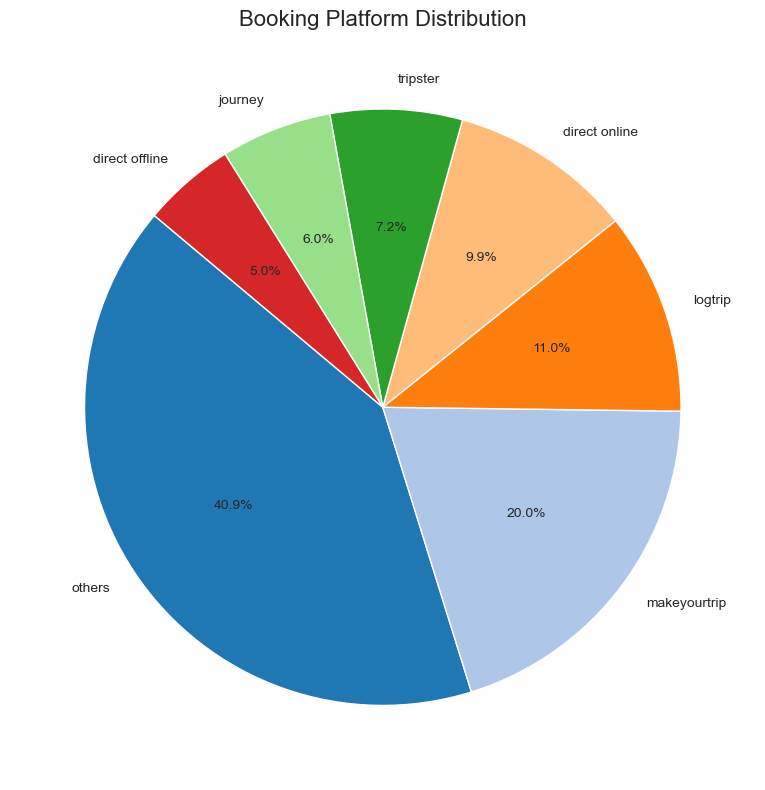

In [42]:
booking_platform_distribution = bookings_revenue_df['booking_platform'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(booking_platform_distribution, labels=booking_platform_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20'))

plt.title('Booking Platform Distribution', fontsize=16)

plt.tight_layout()
plt.show()
